<a href="https://colab.research.google.com/github/zia207/python-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-03-01-tree-based-models-gradient-boosted-gbm-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1xLlN9eEG2IYFBlAuwl53aDVxcBkRnkEw
)

# 3.1 Gradient Boosting Machine (GBM)


Generalized Boosted  Models, often referred to as Gradient Boosting Machines (GBM), is a powerful ensemble learning technique that builds models in a sequential manner, where each new model attempts to correct the errors made by the previous ones. This notebook provides an overview of GBM, its mathematical formulation, and practical implementation in Python using the {scikit-learn} package for both regression and classification tasks.


## Overview

A Gradient Boosting Machine (GBM) is a powerful machine learning algorithm used primarily for regression and classification tasks. It builds an ensemble of weak learners, typically decision trees, in a sequential manner to minimize a loss function. Each tree corrects the errors of the previous ones by fitting to the negative gradient of the loss function, effectively improving the model's predictions iteratively.

GBM is widely used due to its flexibility, ability to handle various types of data, and high predictive accuracy. Popular implementations include XGBoost, LightGBM, and CatBoost.


### Key Features of GBM

Gradient Boosting Machine (GBM) key features:

1. `Ensemble Learning`: Combines weak learners (decision trees) sequentially.
2. `Gradient Descent`: Minimizes loss function iteratively.
3. `Sequential Correction`: Each tree corrects prior errors.
4. `Flexible Loss Functions`: Supports various loss types.
5. `Regularization`: Uses shrinkage and subsampling to prevent overfitting.
6. `Feature Importance`: Identifies key predictors.
7. `Non-linear Relationships`: Captures complex patterns.
8. `Robustness`: Handles outliers with robust loss functions.
9. `Scalability`: Optimized in tools like XGBoost, LightGBM.
10. `Missing Data`: Natively handles missing values.
11. `Categorical Features`: Efficiently processes categorical data.
12. `Tunable Hyperparameters`: Allows performance optimization.


### How Gradient Boosting Works

Gradient Boosting constructs a model by combining multiple weak learners (usually shallow decision trees) in an additive fashion. It optimizes a specified loss function by iteratively adding trees that reduce the loss. Below is a step-by-step explanation, including the mathematical formulation:

1.  Initialize the Model

The process starts with an initial prediction, often a constant value that minimizes the loss function. For regression, this is typically the mean of the target variable.

$$ F_0(x) = \arg\min_{\gamma} \sum_{i=1}^n L(y_i, \gamma) $$

where:

-   $F_0(x)$: Initial model prediction (e.g., mean for regression).

-   $L(y_i, \gamma)$: Loss function (e.g., mean squared error for regression: $L(y_i, \gamma) = \frac{1}{2}(y_i - \gamma)^2$).

-   $y_i$: True target value for the $i$-th observation.

-   $n$: Number of observations.

For regression with mean squared error, the initial prediction is:

$$ F_0(x) = \frac{1}{n} \sum L_{i=1}^n y_i $$

2.  Compute Residuals (Negative Gradients)

For each iteration $m = 1, 2, ..., M$, compute the residuals, which are the negative gradients of the loss function with respect to the current model's predictions.

$$ r_{im} = -\left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]_{F(x) = F_{m-1}(x)} $$

where:

-   $r_{im}$: Residual for the $i$-th observation at iteration $m$.

-   $F_{m-1}(x)$: Model prediction from the previous iteration.

-   For mean squared error: $L(y_i, F(x_i)) = \frac{1}{2}(y_i - F(x_i))^2$, the residual is:

$$ r_{im} = y_i - F_{m-1}(x_i) $$

3.  Fit a Weak Learner to Residuals

Train a weak learner (e.g., a decision tree) to predict the residuals $r_{im}$. The tree is fitted to minimize the loss when predicting the residuals.

$$ h_m(x) = \arg\min_{h} \sum_{i=1}^n (r_{im} - h(x_i))^2 $$

where:

-   $h_m(x)$: Weak learner (e.g., decision tree) at iteration $m$.

4.  Compute the Optimal Step Size (Learning Rate)

Determine the step size (or learning rate) $\gamma_m$ to scale the contribution of the new tree. This is done by minimizing the loss function along the direction of the new tree.

$$ \gamma_m = \arg\min_{\gamma} \sum_{i=1}^n L(y_i, F_{m-1}(x_i) + \gamma h_m(x_i)) $$

For mean squared error, this can be solved analytically or via line search.

5.  Update the Model

Update the model by adding the scaled predictions of the new tree to the previous model.

$$ F_m(x) = F_{m-1}(x) + \gamma_m h_m(x) $$

where:

-   $F_m(x)$: Updated model after iteration $m$.

-   $\gamma_m$: Learning rate or step size (typically a small value, e.g., 0.1, to prevent overfitting).

6.  Repeat Steps 2–5

Repeat steps 2–5 for $M$ iterations or until a stopping criterion (e.g., minimal improvement in loss) is met.

7.  Final Prediction

The final model is the sum of the initial prediction and all subsequent trees' contributions:

$$ F_M(x) = F_0(x) + \sum_{m=1}^M \gamma_m h_m(x) $$

Here below is a flowchart illustrating the Random Forest workflow:


![alt text](http://drive.google.com/uc?export=view&id=1wO9IGbhk_Sm5VMp6TjqpHX44eS6Ax0Eg)








### Advantages of Gradient Boosting Machine (GBM)

1. `High Accuracy`: Often outperforms other algorithms by effectively modeling complex, non-linear relationships.
2. `Flexibility`: Supports various loss functions and works for both regression and classification tasks.
3. `Feature Importance`: Provides insights into which features drive predictions.
4. `Handles Mixed Data`: Effectively processes numerical and categorical features (especially in implementations like CatBoost).
5. `Robustness`: Can handle outliers and missing data with appropriate configurations.

### Limitations of GBM

1. `Computationally Intensive`: Training can be slow, especially with large datasets or many trees.
2. `Overfitting Risk`: Requires careful tuning to avoid overfitting, particularly with noisy data.
3. `Hyperparameter Sensitivity`: Performance depends heavily on proper tuning, which can be time-consuming.
4. `Less Interpretable`: Compared to simpler models like linear regression, the ensemble is harder to interpret.
5. `Scalability Issues`: Less efficient on extremely large datasets compared to simpler models unless optimized (e.g., LightGBM).

### Key Hyperparameters of GBM

1. `n.trees`: Number of trees (100–10,000). Tune with CV (e.g., 500, 1000, 2000).
2. `shrinkage`: Learning rate (0.001–0.3). Try 0.01, 0.05, 0.1 for balance.
3. `interaction.depth`: Tree depth (1–10). Use 1–5 for weak learners.
4. `n.minobsinnode`: Min observations per node (5–20). Try 5–10 for small datasets.
5. `bag.fraction*` Subsampling fraction (0.5–1.0). Default 0.5 reduces overfitting.
6. `distribution`: Loss function (e.g., `gaussian` for regression, `bernoulli` for classification).

Proper tuning of these hyperparameters is critical for balancing performance and generalization in GBM.

### How GBM Differs from XGBoost and LightGBM

Gradient Boosting Machine (GBM) is a general framework for building ensemble models by sequentially adding weak learners (typically decision trees) to minimize a loss function. XGBoost and LightGBM are optimized implementations of the GBM framework, each introducing specific enhancements to improve performance, scalability, and efficiency. Below is a detailed comparison of how GBM differs from XGBoost and LightGBM, focusing on key aspects such as algorithmic improvements, optimization techniques, and practical considerations.

  | **Aspect** | **Standard GBM** | **XGBoost** | **LightGBM** |
    |-----------------|-------------------|-------------------|------------------|
    | **Algorithm** | Basic gradient boosting | Enhanced gradient boosting with regularization | Optimized gradient boosting with GOSS, EFB |
    | **Tree Growth** | Level-wise | Level-wise | Leaf-wise |
    | **Regularization** | Basic (learning rate) | L1 and L2 regularization | L1 and L2 regularization |
    | **Gradient Usage** | First-order gradients | First- and second-order gradients | First-order with GOSS sampling |
    | **Feature Handling** | Requires preprocessing (e.g., imputation) | Handles missing values natively | Handles missing values and categorical features natively |
    | **Split Finding** | Exact split finding | Approximate (quantile sketching) | Histogram-based |
    | **Parallelization** | Sequential | Feature-level parallelization | Data- and feature-level parallelization |
    | **Memory Efficiency** | High memory usage | Moderate memory usage | Low memory usage (histogram, EFB) |
    | **Speed** | Slowest | Faster than GBM | Fastest, especially for large datasets |
    | **Overfitting Risk** | Moderate | Low (due to regularization) | Higher with leaf-wise growth (needs tuning) |
    | **Implementation** | Scikit-learn, others | XGBoost library | LightGBM library |


### Practical Considerations

-   **Standard GBM**:

    -   Best for small datasets or when simplicity is preferred.
    -   Suitable for educational purposes or when using scikit-learn’s ecosystem.
    -   Limited scalability for large datasets due to lack of optimizations.

-   **XGBoost**:
    -   Ideal for medium to large datasets where accuracy is critical.
    -   Preferred when robust regularization and handling of missing data are needed.
    -   Widely used in competitions (e.g., Kaggle) due to its balance of speed and accuracy.

-   **LightGBM**:
    -   Best for very large datasets or high-dimensional data (e.g., millions of rows, thousands of features).
    -   Preferred for applications requiring fast training and low memory usage.
    -   Requires careful tuning to avoid overfitting due to leaf-wise growth.

## Gradient Boosting Machine (GBM) in Python from scratch

We’ll implement a basic GBM algorithm from scratch. This will involve manually coding the gradient boosting steps (initialization, residual computation, fitting weak learners, and updating predictions) using only base R.

### Function to Fit a Decision Stump

`fit_stump` finds the best feature and threshold to split the data, minimizing MSE. It evaluates each feature’s unique values as thresholds and computes the mean of the target variable  for the left and right splits. The split with the lowest MSE is chosen as the best stump.


A `decision stump`is a simple machine learning model consisting of a single-level decision tree with only one split (or decision node) based on a single feature. It is considered a weak learner because it makes predictions using a single threshold or condition, resulting in limited predictive power on its own. Decision stumps are commonly used as base learners in ensemble methods like boosting (e.g., AdaBoost, Gradient Boosting) to iteratively combine multiple weak models into a strong predictive model.






In [ ]:
import numpy as np

# Helper function: Simple decision stump (single split tree)
def decision_stump(X, y, weights, is_regression):
    n = len(y)
    best_feature = 0
    best_threshold = 0
    best_error = float('inf')

    # Try each feature and possible split points
    for feature in range(X.shape[1]):
        values = np.sort(np.unique(X[:, feature]))
        thresholds = (values[:-1] + values[1:]) / 2

        for threshold in thresholds:
            left_idx = X[:, feature] <= threshold
            right_idx = ~left_idx

            if sum(left_idx) == 0 or sum(right_idx) == 0:
                continue

            if is_regression:
                # Regression: predict mean for each region
                left_pred = np.mean(y[left_idx])
                right_pred = np.mean(y[right_idx])
                error = (np.sum(weights[left_idx] * (y[left_idx] - left_pred) ** 2) +
                         np.sum(weights[right_idx] * (y[right_idx] - right_pred) ** 2))
            else:
                # Classification: predict log-odds for each region
                left_prob = np.mean(y[left_idx])
                right_prob = np.mean(y[right_idx])
                left_prob = max(min(left_prob, 0.999), 0.001)  # Avoid log(0)
                right_prob = max(min(right_prob, 0.999), 0.001)
                error = -np.sum(weights[left_idx] * (y[left_idx] * np.log(left_prob) +
                                                    (1 - y[left_idx]) * np.log(1 - left_prob))) - \
                        np.sum(weights[right_idx] * (y[right_idx] * np.log(right_prob) +
                                                    (1 - y[right_idx]) * np.log(1 - right_prob)))

            if error < best_error:
                best_error = error
                best_feature = feature
                best_threshold = threshold
                best_left_pred = left_pred if is_regression else np.log(left_prob / (1 - left_prob))
                best_right_pred = right_pred if is_regression else np.log(right_prob / (1 - right_prob))

    return {
        'feature': best_feature,
        'threshold': best_threshold,
        'left_pred': best_left_pred,
        'right_pred': best_right_pred
    }

### Function to Predict with a Decision Stump

`predict_stump`: Predicts based on the stump’s feature, threshold, and leaf values.


In [ ]:
# Predict function for a single decision stump
def predict_stump(stump, X):
    preds = np.full(X.shape[0], stump['right_pred'])
    left_idx = X[:, stump['feature']] <= stump['threshold']
    preds[left_idx] = stump['left_pred']
    return preds

### GBM for Regression and Classification

In [ ]:
# GBM for Regression
def gbm_regression(X, y, n_trees=50, learning_rate=0.1, max_depth=1):
    n = len(y)
    # Initialize predictions with mean
    f = np.full(n, np.mean(y))
    trees = []

    for _ in range(n_trees):
        # Compute residuals (negative gradient of squared loss)
        residuals = y - f
        weights = np.full(n, 1/n)  # Uniform weights for regression

        # Fit a decision stump to residuals
        tree = decision_stump(X, residuals, weights, True)

        # Update predictions
        f = f + learning_rate * predict_stump(tree, X)
        trees.append(tree)

    return {
        'trees': trees,
        'learning_rate': learning_rate,
        'init_pred': np.mean(y)
    }

# GBM for Classification (binary)
def gbm_classification(X, y, n_trees=50, learning_rate=0.1, max_depth=1):
    n = len(y)
    # Initialize with log-odds
    p = np.mean(y)
    p = max(min(p, 0.999), 0.001)  # Avoid log(0)
    f = np.full(n, np.log(p / (1 - p)))
    trees = []

    for _ in range(n_trees):
        # Compute probabilities
        p = 1 / (1 + np.exp(-f))
        # Compute residuals (negative gradient of log-loss)
        residuals = y - p
        weights = p * (1 - p)  # Weights based on variance of logistic

        # Fit a decision stump to residuals
        tree = decision_stump(X, residuals, weights, False)

        # Update predictions
        f = f + learning_rate * predict_stump(tree, X)
        trees.append(tree)

    return {
        'trees': trees,
        'learning_rate': learning_rate,
        'init_pred': np.log(p / (1 - p))
    }

### Predict Functions



In [ ]:
# Predict function for GBM regression
def predict_gbm_regression(model, X):
    preds = np.full(X.shape[0], model['init_pred'])
    for tree in model['trees']:
        preds = preds + model['learning_rate'] * predict_stump(tree, X)
    return preds

# Predict function for GBM classification
def predict_gbm_classification(model, X):
    f = np.full(X.shape[0], model['init_pred'])
    for tree in model['trees']:
        f = f + model['learning_rate'] * predict_stump(tree, X)
    # Return probabilities
    return 1 / (1 + np.exp(-f))

### Example Usage - Regression

In [ ]:
np.random.seed(123)

# Generate synthetic data for regression
n = 100
X = np.random.uniform(0, 10, size=(n, 2))
y_reg = 2 * X[:, 0] + 3 * X[:, 1] + np.random.normal(0, 1, n)

# Train and predict regression
model_reg = gbm_regression(X, y_reg, n_trees=50, learning_rate=0.1)
preds_reg = predict_gbm_regression(model_reg, X)

# Print mean squared error for regression
mse = np.mean((y_reg - preds_reg) ** 2)
print(f"Regression MSE: {mse}")

Regression MSE: 5.609652726812711


### Example Usage: Classification

In [ ]:
np.random.seed(123)

# Generate synthetic data for classification
y_class = (X[:, 0] + X[:, 1] > 10).astype(int)
y_class = (y_class + (np.random.normal(0, 0.1, n) > 0)).astype(int)
y_class = (y_class > 0.5).astype(int)

# Train and predict classification
model_class = gbm_classification(X, y_class, n_trees=50, learning_rate=0.1)
preds_class = predict_gbm_classification(model_class, X)

# Print classification accuracy
accuracy = np.mean((preds_class > 0.5) == y_class)
print(f"Classification Accuracy: {accuracy}")



Classification Accuracy: 0.22


## Gradient Boosting Machine (GBM) in Python

A Gradient Boosting Machine (GBM) in Python is a robust ensemble learning algorithm used for regression and classification tasks. It builds a model by sequentially combining weak learners, typically decision trees, where each tree corrects the errors of its predecessors by minimizing a loss function using gradient descent. Implemented in libraries like scikit-learn (`GradientBoostingRegressor`, `GradientBoostingClassifier`), XGBoost, or LightGBM, GBM excels in capturing complex patterns and handling diverse data types. Its performance relies on tuning hyperparameters such as `n_estimators`, `learning_rate`, and `max_depth`, balancing accuracy and overfitting risk.



### Regression with GBM

The `GradientBoostingRegressor` in {scikit-learn} is a powerful machine learning algorithm for regression tasks, implementing Gradient Boosting Machines (GBMs). It builds an ensemble of weak learners, typically decision trees, sequentially, where each tree corrects errors of the previous ones by minimizing a loss function (e.g., mean squared error) using gradient descent. Known for its high predictive accuracy, flexibility with various loss functions, and ability to capture non-linear relationships, it’s widely used for tasks requiring robust regression models. Key hyperparameters like `n_estimators`, `learning_rate`, and `max_depth` allow fine-tuning for optimal performance, though careful tuning is needed to prevent overfitting.

 The dataset will be split into training and testing sets, and we will evaluate the model's performance using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')

#### Data and Data Preparation



In [2]:
# Load California Housing data
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

# Combine features and target for easier splitting and scaling
df = X.copy()
df['MedHouseVal'] = y

# Set random seed for reproducibility
np.random.seed(123)

# Display data summary
print(df.head())
print(df.dtypes)

# Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Feature scaling (only apply to features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display scaled data summary
print("\nTraining set after scaling:")
display(X_train_scaled.head())
print("\nTest set after scaling:")
display(X_test_scaled.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Training set after scaling:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.692180,-0.763911,-0.646513,-0.043167,-0.028017,-0.444280,-0.717043,0.720503
1,-1.441867,0.268592,-0.137682,0.164747,-1.045758,-0.082440,-0.170430,0.291501
2,-0.151089,0.506862,-0.023684,0.003777,-0.728265,0.132365,-0.815154,0.735468
3,0.508646,0.506862,0.648393,0.202899,-0.633017,0.407276,-0.801138,0.625724
4,0.308535,-1.002181,0.199823,-0.023632,-0.766188,-0.153912,1.263846,-0.566503



Test set after scaling:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.927644,0.586286,0.288361,-0.247872,-0.604796,-0.215056,0.978860,-1.454437
1,4.134992,0.665709,0.920643,-0.310363,-0.936399,-0.175258,-0.880560,0.625724
2,-0.760492,1.459942,-0.225360,-0.171757,-0.207048,0.739077,-0.740403,0.690573
3,0.238897,-0.922757,0.159241,-0.168157,-0.429293,0.113065,-0.058304,-0.551538
4,3.287980,-0.525641,1.048032,-0.165763,-0.155014,-0.053411,-1.301032,1.164470


#### Fit a GBM Regression Model

The code below trains a Gradient Boosting Regression model using scikit-learn. It's initialized with 100 trees, a `learning_rate` of 0.1, and a `max_dept`h of 3 for each tree. The model is then fitted to the scaled training features (X_train_scaled) and the training target variable (y_train).


In [3]:
# Fit an initial GBM model
initial_model = GradientBoostingRegressor(n_estimators=100,
                                          learning_rate=0.1,
                                          max_depth=3,
                                          random_state=123)
initial_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=123)

#### Evaluate initial model to find optimal number of trees using OOB



In [5]:
# Evaluate initial model to find optimal number of trees using OOB
# Note: scikit-learn's GradientBoostingRegressor requires subsample < 1.0
# and setting n_iter_no_change or tol for built-in early stopping based on OOB improvement.
# The oob_improvement_ attribute provides the improvement at each stage.

# Since the initial model was fitted without subsample, we'll refit with subsample
# to demonstrate OOB evaluation equivalent.
initial_model_oob = GradientBoostingRegressor(n_estimators=100,
                                                  learning_rate=0.1,
                                                  max_depth=3,
                                                  random_state=123,
                                                  subsample=0.8, # Use subsampling for OOB
                                                  n_iter_no_change=10, # Stop if no improvement for 10 iterations
                                                  tol=0.01 # Tolerance for improvement
                                                 )
initial_model_oob.fit(X_train_scaled, y_train)

# The number of trees is determined by the early stopping if enabled.
# If early stopping did not activate, it's n_estimators.
initial_n_trees_oob = initial_model_oob.n_estimators_ # Number of boosting stages fitted
print(f"Optimal number of trees (based on OOB early stopping or n_estimators): {initial_n_trees_oob}")

# You can also inspect the OOB improvement at each stage
# print("OOB improvement at each stage:", initial_gbm_model_oob.oob_improvement_)


Optimal number of trees (based on OOB early stopping or n_estimators): 71


#### Calculate cumulative OOB error

---



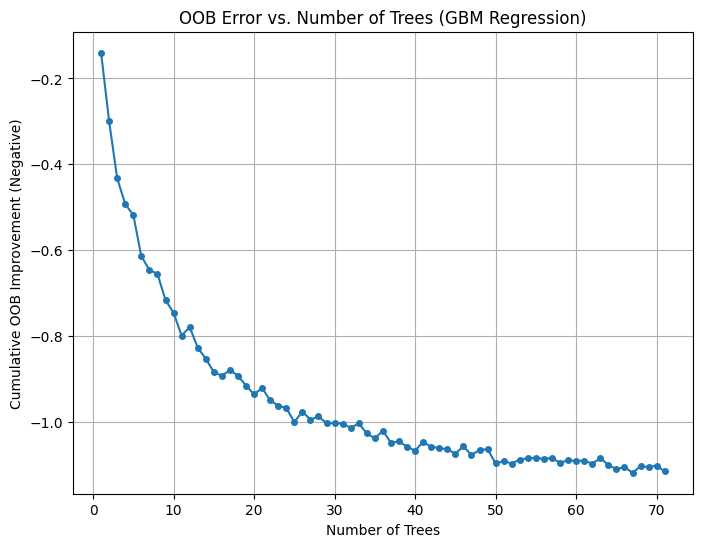

In [11]:
# Calculate cumulative OOB error
# The oob_improvement_ attribute stores the improvement at each stage.
# The initial error is not stored, but we can assume it's high.
# We can plot the negative cumulative sum of improvements as a proxy for error reduction.
# A smaller value (more negative) indicates better performance.

oob_errors = -np.cumsum(initial_model_oob.oob_improvement_)
n_trees = np.arange(1, initial_model_oob.n_estimators_ + 1)

plt.figure(figsize=(8, 6))
plt.plot(n_trees, oob_errors, marker='o', linestyle='-', markersize=4)
plt.xlabel("Number of Trees")
plt.ylabel("Cumulative OOB Improvement (Negative)")
plt.title("OOB Error vs. Number of Trees (GBM Regression)")
plt.grid(True)
plt.show()

#### Predict and Evaluate Initial Model

In [12]:
# Predict on the test set
initial_predictions = initial_model_oob.predict(X_test_scaled)

# Evaluate the model
initial_mse = mean_squared_error(y_test, initial_predictions)
initial_rmse = np.sqrt(initial_mse)
initial_r2 = r2_score(y_test, initial_predictions)

print(f"Initial GBM Model Performance:")
print(f"  Mean Squared Error (MSE): {initial_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {initial_rmse:.4f}")
print(f"  R-squared (R2): {initial_r2:.4f}")

Initial GBM Model Performance:
  Mean Squared Error (MSE): 0.3277
  Root Mean Squared Error (RMSE): 0.5725
  R-squared (R2): 0.7578


#### Hyperparameter Tuning for the Best Parameters

We will perform hyperparameter tuning using grid search to find the best parameters for the GBM model. The grid search will evaluate different combinations of hyperparameters such as `n_estimators`, `learning_rate`, `max_depth`, and `min_samples_split` to minimize the mean squared error (MSE) using cross-validation.

In [13]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=123),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Use negative MSE for optimization
                           cv=3,  # 3-fold cross-validation
                           n_jobs=-1)  # Use all available cores

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_mse_cv = -grid_search.best_score_ # Convert negative MSE back to positive

print("Best parameters found: ", best_params)
print(f"Best cross-validation MSE: {best_mse_cv:.4f}")

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validation MSE: 0.2181


#### Fit Final Model with Best Parameters

In [15]:
features_for_model = X_train_scaled.columns

# Fit the final GBM model with best parameters from GridSearchCV
final_model = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    # min_samples_leaf is equivalent to n.minobsinnode but is not in best_params
    # We will use the default value or you can add it to param_grid if needed.
    random_state=123  # For reproducibility
)

final_model.fit(X_train_scaled[features_for_model], y_train)

print("Final GBM Model (Python) fitted.")

Final GBM Model (Python) fitted.


#### Predict and Evaluate Final Model

In [16]:
# Predict on the test set
final_predictions = final_model.predict(X_test_scaled)

# Evaluate the model
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, final_predictions)

print(f"Final GBM Model Performance:")
print(f"  Mean Squared Error (MSE): {final_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {final_rmse:.4f}")
print(f"  R-squared (R2): {final_r2:.4f}")

Final GBM Model Performance:
  Mean Squared Error (MSE): 0.2305
  Root Mean Squared Error (RMSE): 0.4801
  R-squared (R2): 0.8297


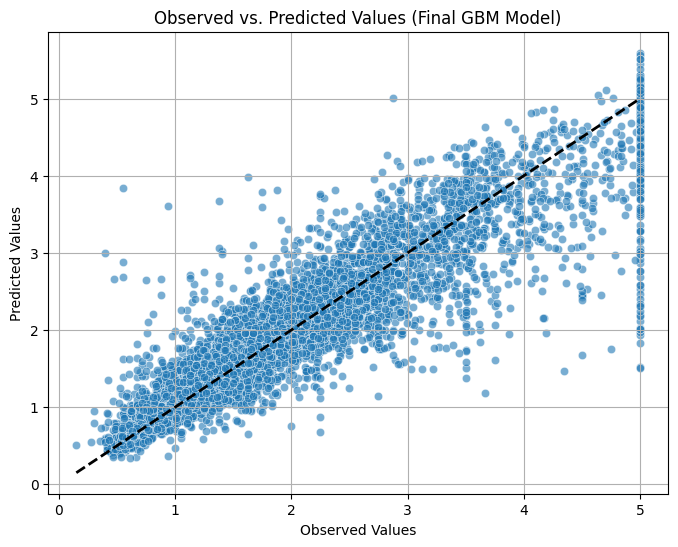

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set using the initial model
# Use the initial_gbm_model which was not fitted with early stopping
# If you want to use the model with early stopping, use initial_gbm_model_oob
initial_predictions = initial_model.predict(X_test_scaled)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=final_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Ideal line
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Observed vs. Predicted Values (Final GBM Model)")
plt.grid(True)
plt.show()

#### Feature Importance

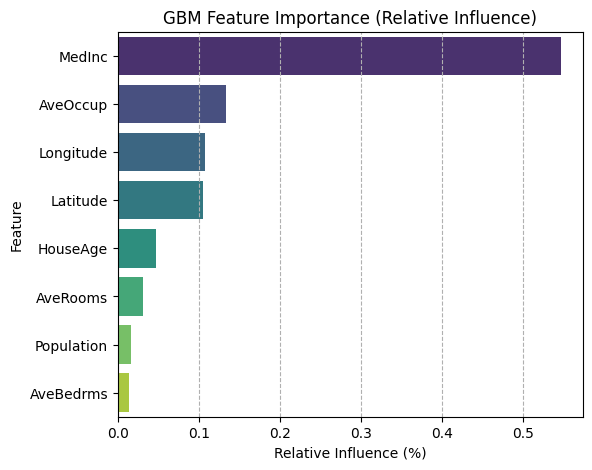

In [23]:
# Plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the fitted model
feature_importance = final_model.feature_importances_

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': features_for_model,
    'Gain': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values('Gain', ascending=False)

# Plot feature importance
plt.figure(figsize=(6, 5))
sns.barplot(x='Gain', y='Feature', data=importance_df, palette='viridis')
plt.xlabel("Relative Influence (%)")
plt.ylabel("Feature")
plt.title("GBM Feature Importance (Relative Influence)")
plt.grid(axis='x', linestyle='--')
plt.show()

### Classification with GBM

In this section, we will use the {gbm} package to perform classification tasks. We will load the dataset, preprocess it, and then fit a GBM model for classification. The dataset will be split into training and testing sets, and we will evaluate the model's performance using accuracy and multi-class log loss.

#### Data and Data Preparation

We will use`health insurance` dataset to predict the product type (A, B, or C) based on various features such as age, household size, position level, and absence records.

In [24]:
import pandas as pd

# Load data
url = "https://github.com/zia207/r-colab/raw/main/Data/Machine_Learning/health_insurance.csv"
mf = pd.read_csv(url)
print(mf.head())

# Convert to factor

from sklearn.preprocessing import LabelEncoder

mf['product'] = mf['product'].astype('category')
mf['gender'] = mf['gender'].astype('category')

# Encode gender numerically
label_encoder = LabelEncoder()
mf['gender_encoded'] = label_encoder.fit_transform(mf['gender'])

# Check levels of gender
print("Gender categories:", mf['gender'].cat.categories)
print("Encoded gender values:", mf['gender_encoded'].unique())

# Split data
from sklearn.model_selection import train_test_split
import numpy as np

# Set seed for reproducibility
np.random.seed(11076)
tr_prop = 0.70

# Stratified split based on product and gender
train, test = train_test_split(mf, train_size=tr_prop, stratify=mf[['product', 'gender']], random_state=101)

# Print proportion of product in training set
print(train['product'].value_counts(normalize=True))

  product  age  household  position_level  gender  absent
0       C   57          2               2    Male      10
1       A   21          7               2    Male       7
2       C   66          7               2    Male       1
3       A   36          4               2  Female       6
4       A   23          0               2    Male      11
Gender categories: Index(['Female', 'Male'], dtype='object')
Encoded gender values: [1 0]
product
C    0.343534
A    0.340573
B    0.315893
Name: proportion, dtype: float64


#### Fit GBM Classification Model

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

# For reproducibility
np.random.seed(123)

# Define features (X) and target (y) for classification
# Use the original training data before scaling for classification
X_train_class = train[['age', 'household', 'position_level', 'absent']]
y_train_class = train['product']

# Initialize the GBM classifier
initial_model_class = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_leaf=10, # Equivalent to n.minobsinnode
    random_state=123,
    # For multinomial distribution, scikit-learn automatically handles it based on the target variable
)

# Fit the model
initial_model_class.fit(X_train_class, y_train_class)

print("Initial GBM Classification Model (Python) fitted.")

Initial GBM Classification Model (Python) fitted.


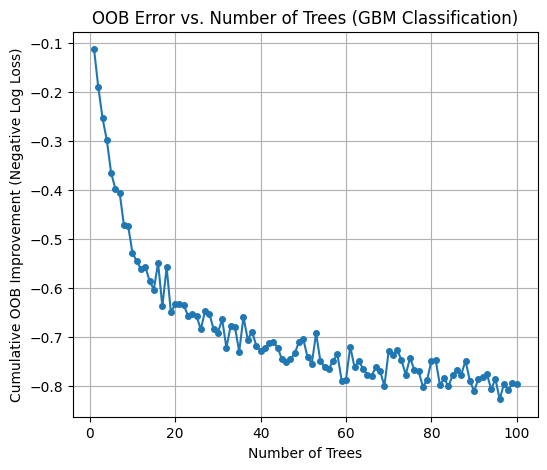

Number of trees fitted in the initial model: 100


In [34]:
# Plot model error using OOB scores from scikit-learn
# The oob_improvement_ attribute provides the improvement at each stage.
# For classification, the default scoring in GradientBoostingClassifier is deviance,
# which is equivalent to log loss. Lower values are better.
# We plot the negative cumulative sum of improvements as a proxy for error reduction.

oob_errors = -np.cumsum(initial_model_class.oob_improvement_)

plt.figure(figsize=(6, 5))
plt.plot(np.arange(1, len(oob_errors) + 1),
         oob_errors,
         marker='o',
         linestyle='-',
         markersize=4)
plt.xlabel("Number of Trees")
plt.ylabel("Cumulative OOB Improvement (Negative Log Loss)")
plt.title("OOB Error vs. Number of Trees (GBM Classification)")
plt.grid(True)
plt.show()

# The optimal number of trees can be estimated from the plot where the error plateaus or starts increasing.
# Scikit-learn's GradientBoostingClassifier does not have a direct equivalent to gbm.perf's OOB method
# for automatically selecting the optimal number of trees after fitting.
# Early stopping during fitting is the recommended approach in scikit-learn.
# If early stopping was used (e.g., with n_iter_no_change), initial_model_class.n_estimators_
# would give the number of trees at which stopping occurred.
# Since we didn't use early stopping in the initial model, n_estimators_ will be the total number of trees.
# To get the best number of trees based on the plot, you would visually inspect it.
# For demonstration, we'll just use the total number of trees fitted in the initial model.
initial_n_trees = initial_model_class.n_estimators_
print(f"Number of trees fitted in the initial model: {initial_n_trees}")

#### Predictions and Evaluation

For model evalution we will use `accuracy` and `multi-class log loss` as metrics. The accuracy is the proportion of correct predictions, while the multi-class log loss measures the performance of a classification model whose output is a probability value between 0 and 1 for each class.

The multi-class log loss (also called cross-entropy loss) can be computed manually in R using the formula:

$$ \text{multi_logloss} = -\frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{ik} \log(\hat{p}_{ik}) $$

where:

-   $N$: Number of observations.

-   $K$: Number of classes (3 for `product`: A, B, C).

-   $y_{ik}$: 1 if observation $i$ belongs to class $k$, 0 otherwise.

-   $\hat{p}_{ik}$: Predicted probability for observation $i$ and class $k$.

The model outputs predicted probabilities for each class (via `predict(..., reshape = TRUE)`), and the true labels are encoded as 0 (A), 1 (B), and 2 (C). We’ll create a custom `multi_logloss` function to compute this metric and update the script accordingly.

In [28]:
import numpy as np

def multi_logloss(actual, predicted_probs):
    """
    Calculates the multi-class log loss.

    Args:
        actual (np.ndarray): Array of true class labels (as integers).
        predicted_probs (np.ndarray): Array of predicted probabilities,
                                     where each row corresponds to an observation
                                     and each column corresponds to a class.

    Returns:
        float: The multi-class log loss.
    """
    epsilon = 1e-15
    # Clip probabilities to avoid log(0)
    predicted_probs = np.clip(predicted_probs, epsilon, 1 - epsilon)

    N = len(actual)
    logloss = 0
    for i in range(N):
        true_class = actual[i]
        # Use the probability of the true class for the log loss calculation
        logloss -= np.log(predicted_probs[i, true_class])

    return logloss / N

In [36]:
from sklearn.metrics import accuracy_score
import numpy as np

# Define features for classification for the test set
X_test_class = test[['age', 'household', 'position_level', 'absent']]
y_test_class = test['product'] # True labels

# Predict probabilities on the test set
initial_pred_probs = initial_model_class.predict_proba(X_test_class)

# Get the predicted classes (index of the highest probability)
initial_pred_classes_idx = np.argmax(initial_pred_probs, axis=1)

# Get the class labels
class_labels = initial_model_class.classes_
initial_pred_classes = class_labels[initial_pred_classes_idx]

# Calculate accuracy
initial_accuracy = accuracy_score(y_test_class, initial_pred_classes)

# Calculate multi-class log loss using the custom function
# Need to convert y_test_class to numerical labels for the multi_logloss function
label_map = {label: i for i, label in enumerate(class_labels)}
y_test_class_encoded = np.array([label_map[label] for label in y_test_class])

initial_logloss = multi_logloss(y_test_class_encoded, initial_pred_probs)


print(f"Initial Model Test Accuracy: {initial_accuracy:.4f}")
print(f"Initial Model Multi_logloss: {initial_logloss:.4f}")

Initial Model Test Accuracy: 0.7471
Initial Model Multi_logloss: 0.4459


In [38]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Generate the confusion matrix
cm = confusion_matrix(y_test_class, initial_pred_classes)

# Create a DataFrame for better visualization (optional)
cm_df = pd.DataFrame(cm, index=initial_model_class.classes_, columns=initial_model_class.classes_)

print("Initial Model Confusion Matrix:")
display(cm_df)

Initial Model Confusion Matrix:


,A,B,C
A,114,24,10
B,26,98,13
C,19,18,113


#### Hyperparameter Tuning for Classification

We will perform hyperparameter tuning using grid search to find the best parameters for the GBM classification model. The grid search will evaluate different combinations of hyperparameters such as `n_estimators`, `learning_rate`, `max_depth`, and `min_samples_split` to minimize the multi-class log loss using cross-validation.

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np

# Define the custom scorer for multi-class log loss
# GridSearchCV minimizes the score, so we need to negate the log loss
neg_multi_logloss_scorer = make_scorer(multi_logloss, greater_is_better=False, needs_proba=True)

# Define the hyperparameter grid
param_grid_class = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV for classification
grid_search_class = GridSearchCV(estimator=GradientBoostingClassifier(random_state=123),
                                 param_grid=param_grid_class,
                                 scoring=neg_multi_logloss_scorer,  # Use negative multi-class log loss
                                 cv=3,  # 3-fold cross-validation
                                 n_jobs=-1)  # Use all available cores

# Perform grid search
grid_search_class.fit(X_train_class, y_train_class)

# Get the best parameters and best score
best_params_class = grid_search_class.best_params_
# Convert negative log loss back to positive
best_logloss_cv = -grid_search_class.best_score_

print("Best parameters found for classification: ", best_params_class)
print(f"Best cross-validation Multi_logloss: {best_logloss_cv:.4f}")

Best parameters found for classification:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation Multi_logloss: nan


#### Fit Final Classification Model with Best Parameters

In [43]:
# Fit the final GBM classification model with best parameters from GridSearchCV
final_model_class = GradientBoostingClassifier(
    n_estimators=best_params_class['n_estimators'],
    learning_rate=best_params_class['learning_rate'],
    max_depth=best_params_class['max_depth'],
    min_samples_split=best_params_class['min_samples_split'],
    random_state=123  # For reproducibility
)

final_model_class.fit(X_train_class, y_train_class)

print("Final GBM Classification Model (Python) fitted.")

Final GBM Classification Model (Python) fitted.


#### Predict and Evaluate Final Classification Model

In [44]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Predict probabilities on the test set
final_pred_probs = final_model_class.predict_proba(X_test_class)

# Get the predicted classes (index of the highest probability)
final_pred_classes_idx = np.argmax(final_pred_probs, axis=1)

# Get the class labels
class_labels = final_model_class.classes_
final_pred_classes = class_labels[final_pred_classes_idx]

# Calculate accuracy
final_accuracy = accuracy_score(y_test_class, final_pred_classes)

# Calculate multi-class log loss using the custom function
# Need to convert y_test_class to numerical labels for the multi_logloss function
label_map = {label: i for i, label in enumerate(class_labels)}
y_test_class_encoded = np.array([label_map[label] for label in y_test_class])

final_logloss = multi_logloss(y_test_class_encoded, final_pred_probs)

print(f"Final Classification Model Test Accuracy: {final_accuracy:.4f}")
print(f"Final Classification Model Multi_logloss: {final_logloss:.4f}")

# Generate the confusion matrix for the final model
from sklearn.metrics import confusion_matrix
cm_final = confusion_matrix(y_test_class, final_pred_classes)
cm_final_df = pd.DataFrame(cm_final, index=class_labels, columns=class_labels)
print("\nFinal Model Confusion Matrix:")
display(cm_final_df)

Final Classification Model Test Accuracy: 0.7379
Final Classification Model Multi_logloss: 0.5898

Final Model Confusion Matrix:


,A,B,C
A,128,20,0
B,36,101,0
C,21,37,92


#### Feature Importance



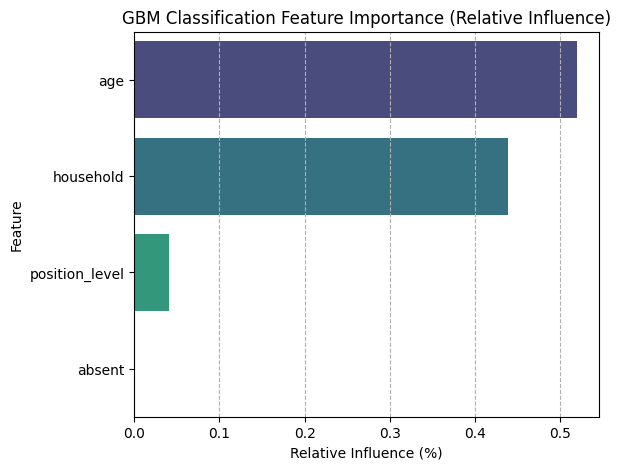

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importance from the final fitted classification model
feature_importance_class = final_model_class.feature_importances_

# Create a DataFrame for plotting
# Use the column names from X_train_class
importance_df_class = pd.DataFrame({
    'Feature': X_train_class.columns,
    'Gain': feature_importance_class
})

# Sort by importance
importance_df_class = importance_df_class.sort_values('Gain', ascending=False)

# Plot feature importance
plt.figure(figsize=(6, 5))
sns.barplot(x='Gain', y='Feature', data=importance_df_class, palette='viridis')
plt.xlabel("Relative Influence (%)")
plt.ylabel("Feature")
plt.title("GBM Classification Feature Importance (Relative Influence)")
plt.grid(axis='x', linestyle='--')
plt.show()

## Summary and Conclusion

This tutorial notebook provided a comprehensive overview of Gradient Boosting Machines (GBM), covering its theoretical foundations, mathematical formulation, and practical implementation in Python using scikit-learn. We explored the key features, advantages, and limitations of GBM, and how it differs from optimized implementations like XGBoost and LightGBM.

We demonstrated GBM for both regression and classification tasks using real-world datasets. For regression, we used the California Housing dataset, performed data preprocessing, fitted an initial GBM model, evaluated its performance using MSE, RMSE, and R-squared, and visualized the OOB error to understand the impact of the number of trees. We then conducted hyperparameter tuning using GridSearchCV to find the optimal parameters and fitted a final model with improved performance. Feature importance analysis helped identify the most influential factors in predicting housing values.

For classification, we used a health insurance dataset to predict product type. We preprocessed the data, fitted an initial GBM classification model, and evaluated its performance using accuracy and multi-class log loss. We also visualized the OOB error. Similar to the regression task, we performed hyperparameter tuning using GridSearchCV with a custom multi-class log loss scorer to find the best parameters. The final classification model was fitted and evaluated, and its feature importance was visualized.

In conclusion, Gradient Boosting Machines are powerful and versatile algorithms capable of achieving high predictive accuracy on both regression and classification problems. While they can be computationally intensive and require careful hyperparameter tuning to avoid overfitting, optimized implementations and techniques like early stopping and regularization help mitigate these challenges. The examples in this notebook illustrate the practical steps involved in building, evaluating, and interpreting GBM models using Python's scikit-learn library.

## References

1.  Friedman, J., Hastie, T., & Tibshirani, R. (2009). *The Elements of Statistical Learning*. Springer. (Chapter 10 covers boosting and GBM fundamentals).

2.  Friedman, J. H. (2001). "Greedy Function Approximation: A Gradient Boosting Machine." *The Annals of Statistics*, 29(5), 1189–1232. (Seminal paper introducing GBM).

3.  Kuhn, M., & Johnson, K. (2013). *Applied Predictive Modeling*. Springer. (Practical guide with GBM applications in R).

4. Scikit-learn Documentation: The official documentation for `gradientBoostingRegressor` and `GradientBoostingClassifier`.

5. Towards Data Science: Search for "Gradient Boosting Python" for various articles and examples.

6. Machine Learning Mastery: Look for tutorials on Gradient Boosting by Jason Brownlee.

